### Prepare your environment

import libraries you will use throughout the project.

In [261]:
# Python 3 environment libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr
from scipy.stats import iqr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

### Data Acquisition

Acquire via a .csv file

In [262]:
path = './'

In [263]:
### Loading Dataset using 'properties_2016.csv'
dfproperties_2016 = pd.read_csv(path + 'properties_2016.csv')

In [264]:
### Loading Dataset using 'train_2016.csv'
dftrain_2016 = pd.read_csv(path + 'train_2016.csv')

In [265]:
### Creating data frame a
df_a = pd.DataFrame(dfproperties_2016, columns = [
      'bathroomcnt',
      'bedroomcnt',
      'calculatedfinishedsquarefeet',
      'fullbathcnt',
      'garagecarcnt',
      'regionidzip',
      'roomcnt',
      'yearbuilt',
      'taxvaluedollarcnt',
      'taxamount',
      'parcelid'])

In [266]:
### Creating data frame b
df_b = pd.DataFrame(dftrain_2016, columns = ['parcelid', 'logerror'])

In [267]:
### Joining the both a and b along the 'parcelid' value
df_join = pd.merge(df_a, df_b, on='parcelid')

### Sumarize Data

In [268]:
### Creating a summary with print statements
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())
    print("\nColumn IQR:\n")
    var_names = df.columns.values
    for var in var_names:
        print(var+":")
        print(iqr(df[var],axis=0))

In [269]:
summarize_df(df_join)


Rows & Columns:

(90275, 12)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 12 columns):
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
regionidzip                     90240 non-null float64
roomcnt                         90275 non-null float64
yearbuilt                       89519 non-null float64
taxvaluedollarcnt               90274 non-null float64
taxamount                       90269 non-null float64
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
dtypes: float64(11), int64(1)
memory usage: 9.0 MB
None

First 5 rows:

   bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
0          2.5         3.0                 

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed.

In [270]:
### Create a variable, colnames, that is a list of the column names.
variables = pd.DataFrame(df_join.columns, columns=['colnames'])
variables

,colnames
0,bathroomcnt
1,bedroomcnt
2,calculatedfinishedsquarefeet
3,fullbathcnt
4,garagecarcnt
5,regionidzip
6,roomcnt
7,yearbuilt
8,taxvaluedollarcnt
9,taxamount


In [271]:
### Replace Null Values
df_join = df_join.apply(lambda x: x.fillna(x.mean()),axis=0)

In [272]:
### Remove Outliers Using Z-Score
df_remove_outliers = df_join[(np.abs(stats.zscore(df_join)) < 3).all(axis=1)]

In [273]:
### Drop unnecessary columns
columns_to_remove = ['regionidzip', 
                     'taxamount', 
                     'fullbathcnt', 
                     'garagecarcnt', 
                     'roomcnt']
df_fixed = df_remove_outliers.drop(columns_to_remove, axis=1)

### Create a list of the independent variable name
df_fixed.columns.values

array(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'yearbuilt', 'taxvaluedollarcnt', 'parcelid', 'logerror'],
      dtype=object)

In [274]:
df_fixed.sort_values(['logerror'], ascending=True).sample(10)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,parcelid,logerror
18846,2.0,3.0,1200.0,1969.0,303283.0,14083463,0.0516
66995,2.5,3.0,1443.0,1990.0,322263.0,14713559,0.0178
71903,2.0,2.0,928.0,1972.0,130253.0,12751284,-0.0408
85147,1.5,3.0,1188.0,1958.0,471000.0,14014583,-0.0182
12397,1.0,3.0,1072.0,1924.0,42380.0,12313111,0.0383
281,2.0,3.0,1298.0,1956.0,496858.0,13996803,-0.0419
26052,4.0,4.0,3516.0,2005.0,1008523.0,14353778,0.0178
26402,2.0,4.0,1582.0,1962.0,466978.0,13072359,-0.0587
53448,2.0,4.0,1564.0,1958.0,96064.0,14088466,-0.0492
44847,3.0,2.0,1303.0,1985.0,256868.0,12601866,-0.0492


In [275]:
df_fixed.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,parcelid,logerror
count,84800.000000,84800.000000,84800.000000,84800.000000,8.480000e+04,8.480000e+04,84800.000000
mean,2.189764,2.954575,1661.673807,1968.456669,3.972315e+05,1.294835e+07,0.007735
std,0.830325,1.019642,688.753279,23.293326,2.983931e+05,1.743571e+06,0.087009
min,0.000000,0.000000,2.000000,1898.000000,2.200000e+01,1.071174e+07,-0.471600
25%,2.000000,2.000000,1172.000000,1953.000000,1.944778e+05,1.153827e+07,-0.025300
50%,2.000000,3.000000,1512.000000,1969.000000,3.330000e+05,1.254638e+07,0.005000
75%,3.000000,4.000000,1992.000000,1986.000000,5.120000e+05,1.421750e+07,0.036300
max,5.000000,6.000000,4546.000000,2015.000000,2.121904e+06,1.730084e+07,0.494100


In [276]:
### Create a list of the independent variable names (aka attributes) and assign it to x_vars
x_vars = df_fixed.columns.values

In [277]:
### Clearly identify your dependent (target) variable
y = df_fixed.columns.values[6]

In [278]:
summarize_df(df_fixed)


Rows & Columns:

(84800, 7)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84800 entries, 0 to 90274
Data columns (total 7 columns):
bathroomcnt                     84800 non-null float64
bedroomcnt                      84800 non-null float64
calculatedfinishedsquarefeet    84800 non-null float64
yearbuilt                       84800 non-null float64
taxvaluedollarcnt               84800 non-null float64
parcelid                        84800 non-null int64
logerror                        84800 non-null float64
dtypes: float64(6), int64(1)
memory usage: 5.2 MB
None

First 5 rows:

   bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  yearbuilt  \
0          2.5         3.0                        1264.0     1986.0   
1          1.0         2.0                         777.0     1990.0   
2          2.0         3.0                        1101.0     1956.0   
3          1.5         2.0                        1554.0     1965.0   
4          2.5         4.0             

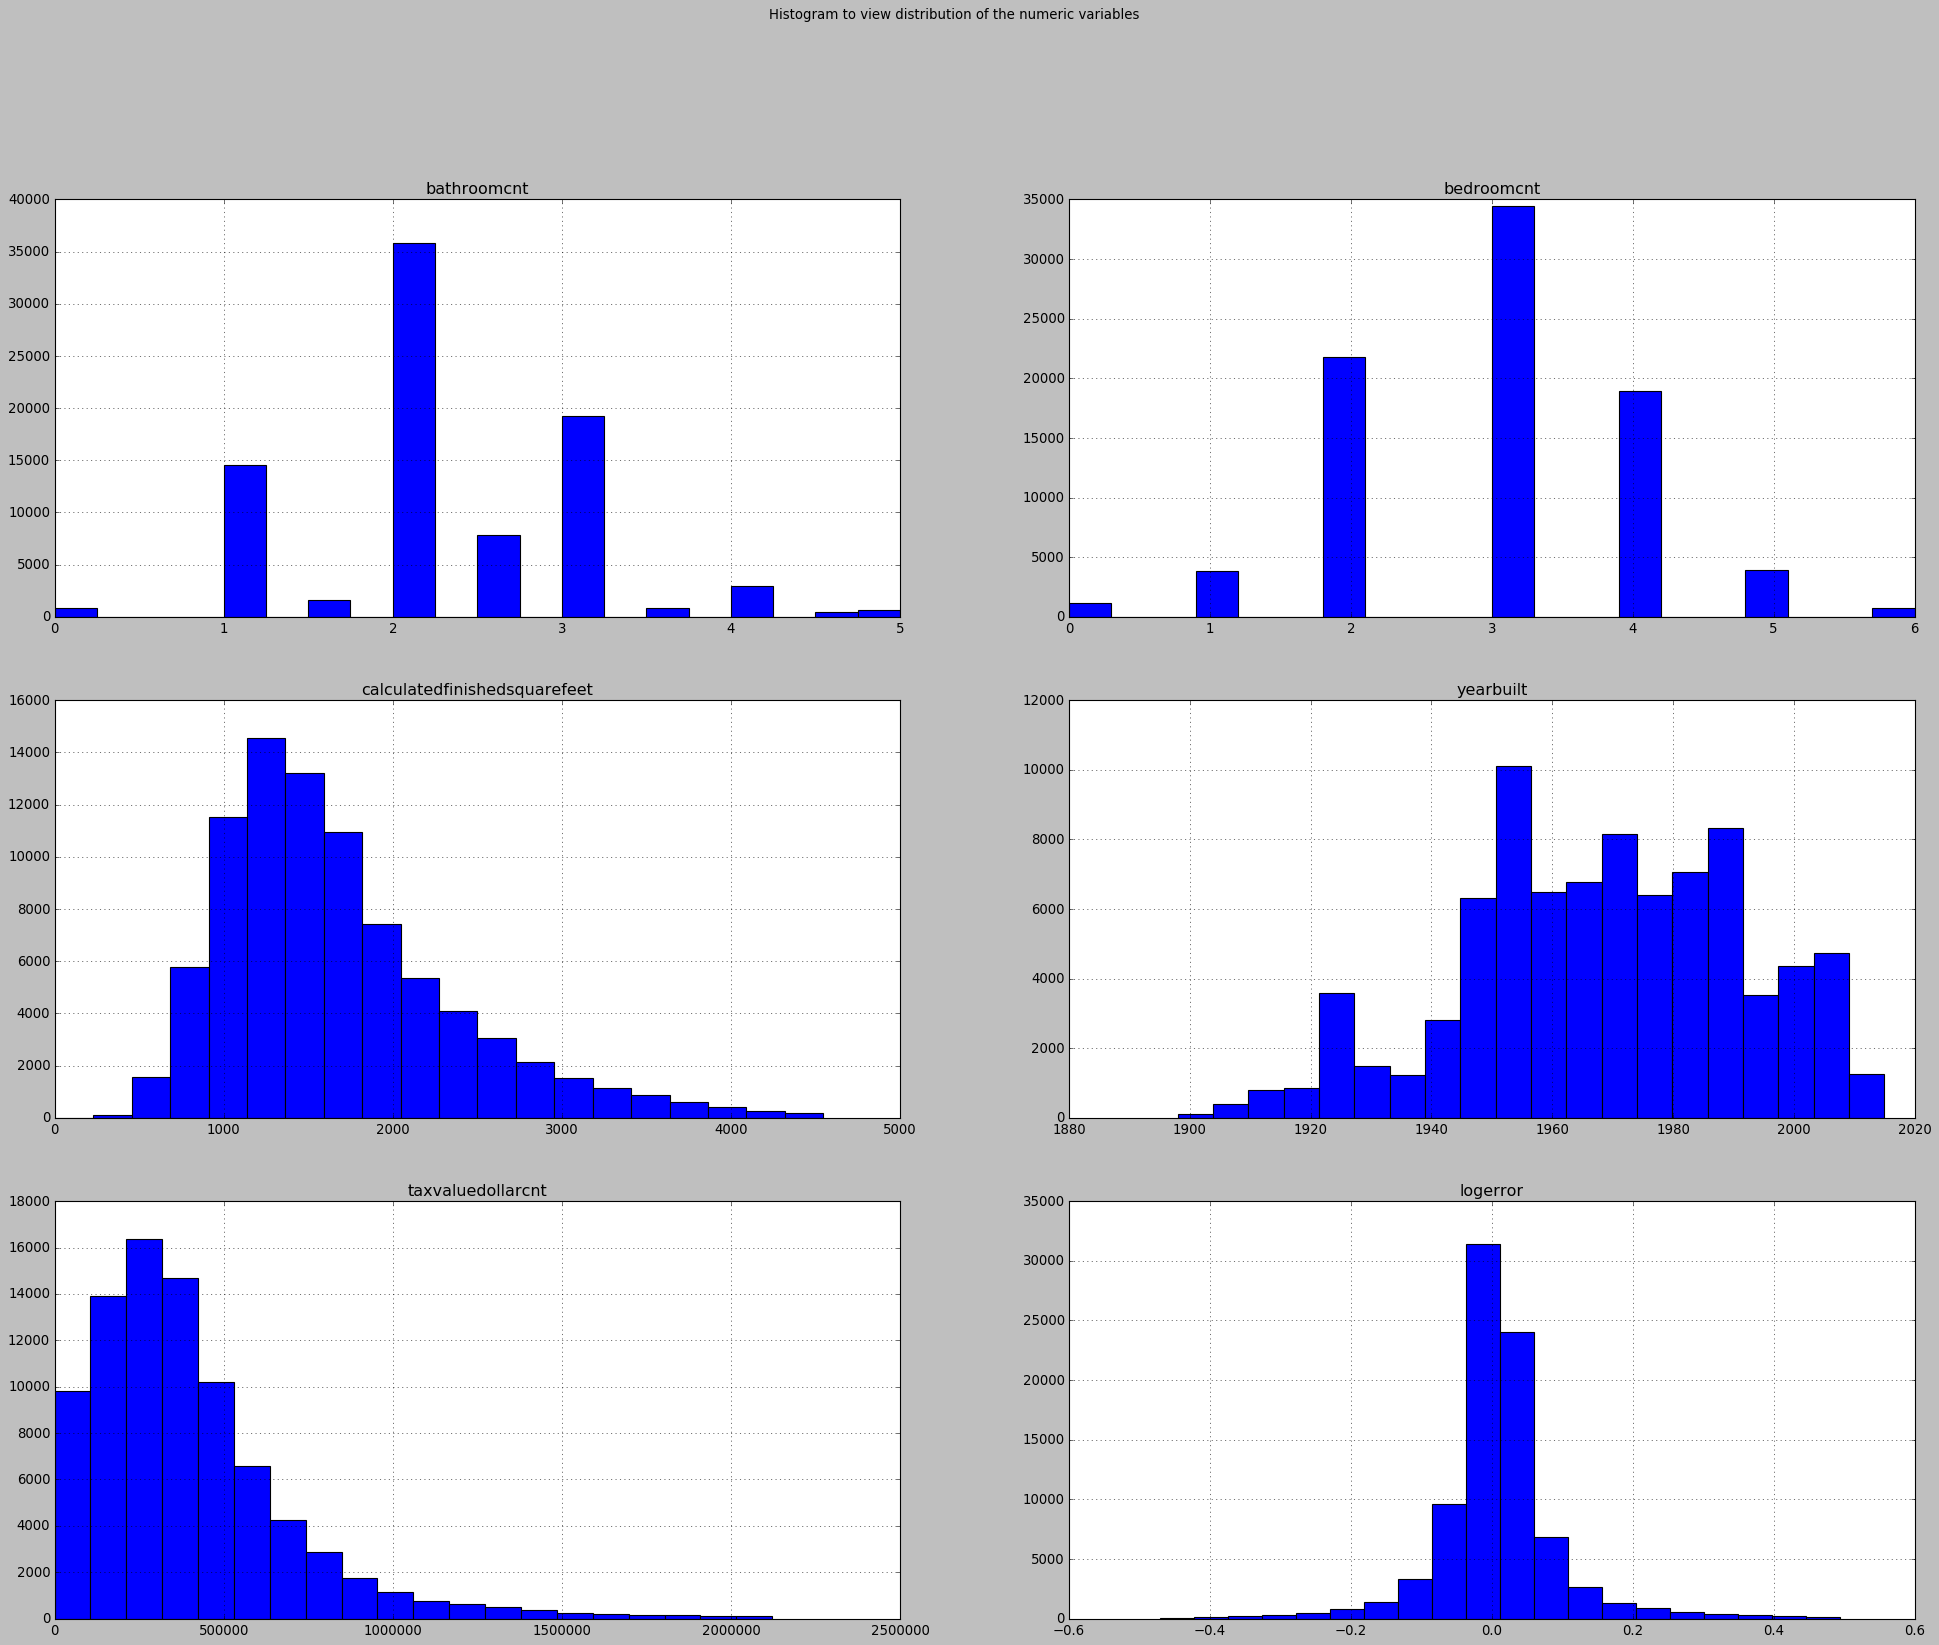

In [279]:
### View the distribution of the numeric variables with histograms
plt.figure(figsize=(30,30))
plt.suptitle('Histogram to view distribution of the numeric variables')

for i, col in enumerate(['bathroomcnt', 
                         'bedroomcnt', 
                         'calculatedfinishedsquarefeet',
                         'yearbuilt', 
                         'taxvaluedollarcnt', 
                         'logerror']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df_fixed[col]  
    plt.subplot(4, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

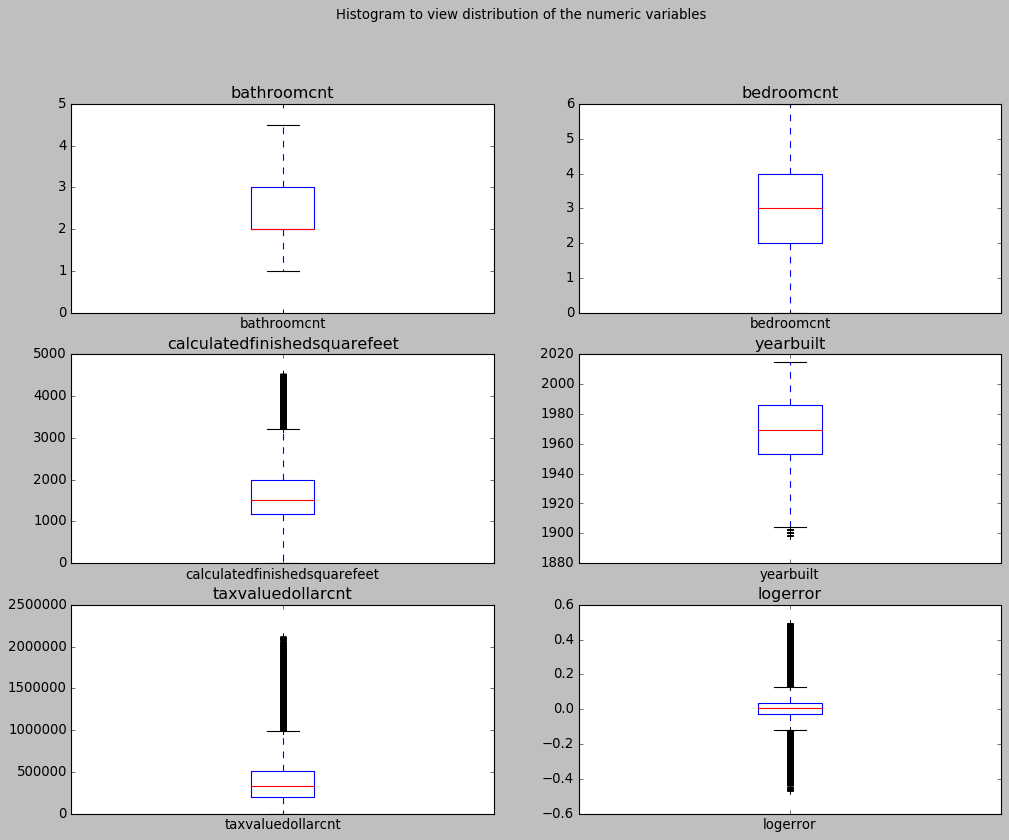

In [280]:
### View the distribution of the numeric variables with boxplots
plt.figure(figsize=(15,15))
plt.suptitle('Histogram to view distribution of the numeric variables')

for i, col in enumerate(['bathroomcnt', 
                         'bedroomcnt', 
                         'calculatedfinishedsquarefeet',
                         'yearbuilt', 
                         'taxvaluedollarcnt', 
                         'logerror']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df_fixed[col]  
    plt.subplot(4, 2, plot_number)
    plt.title(col)
    series.plot.box()

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

In [281]:
### Split data into training and test datasets
X = df_fixed.drop(['logerror','parcelid'], axis=1)
y = df_fixed[['logerror']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [282]:
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'logerror']
Test dimensions (rows, columns): (16960, 6)


<Figure size 800x640 with 0 Axes>

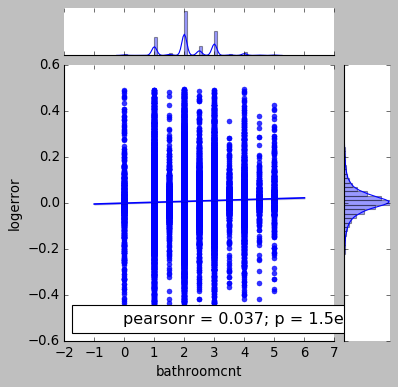

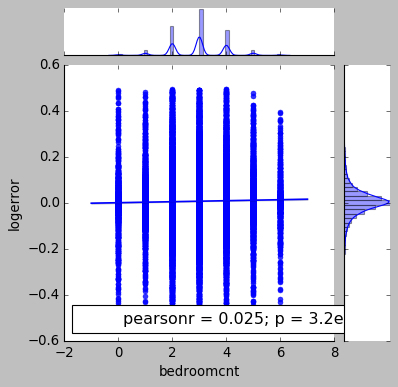

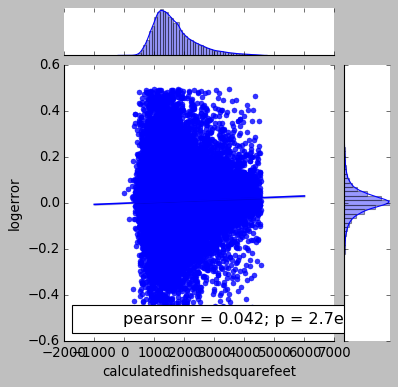

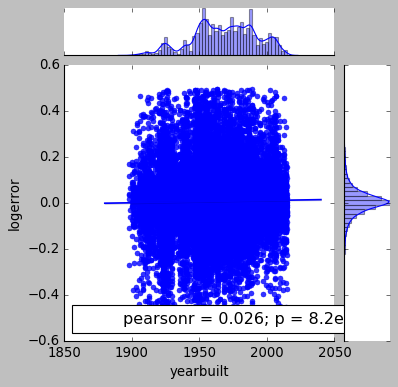

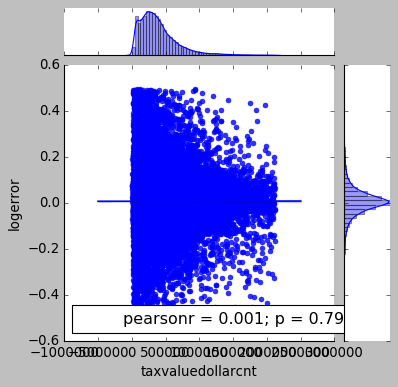

In [283]:
### Create a jointplot for each independent variable (normalized version) with the dependent variable.
plt.figure(figsize=(10, 8))

for i in range(0,5):
    j = sns.jointplot(x_vars[i], 'logerror', data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)

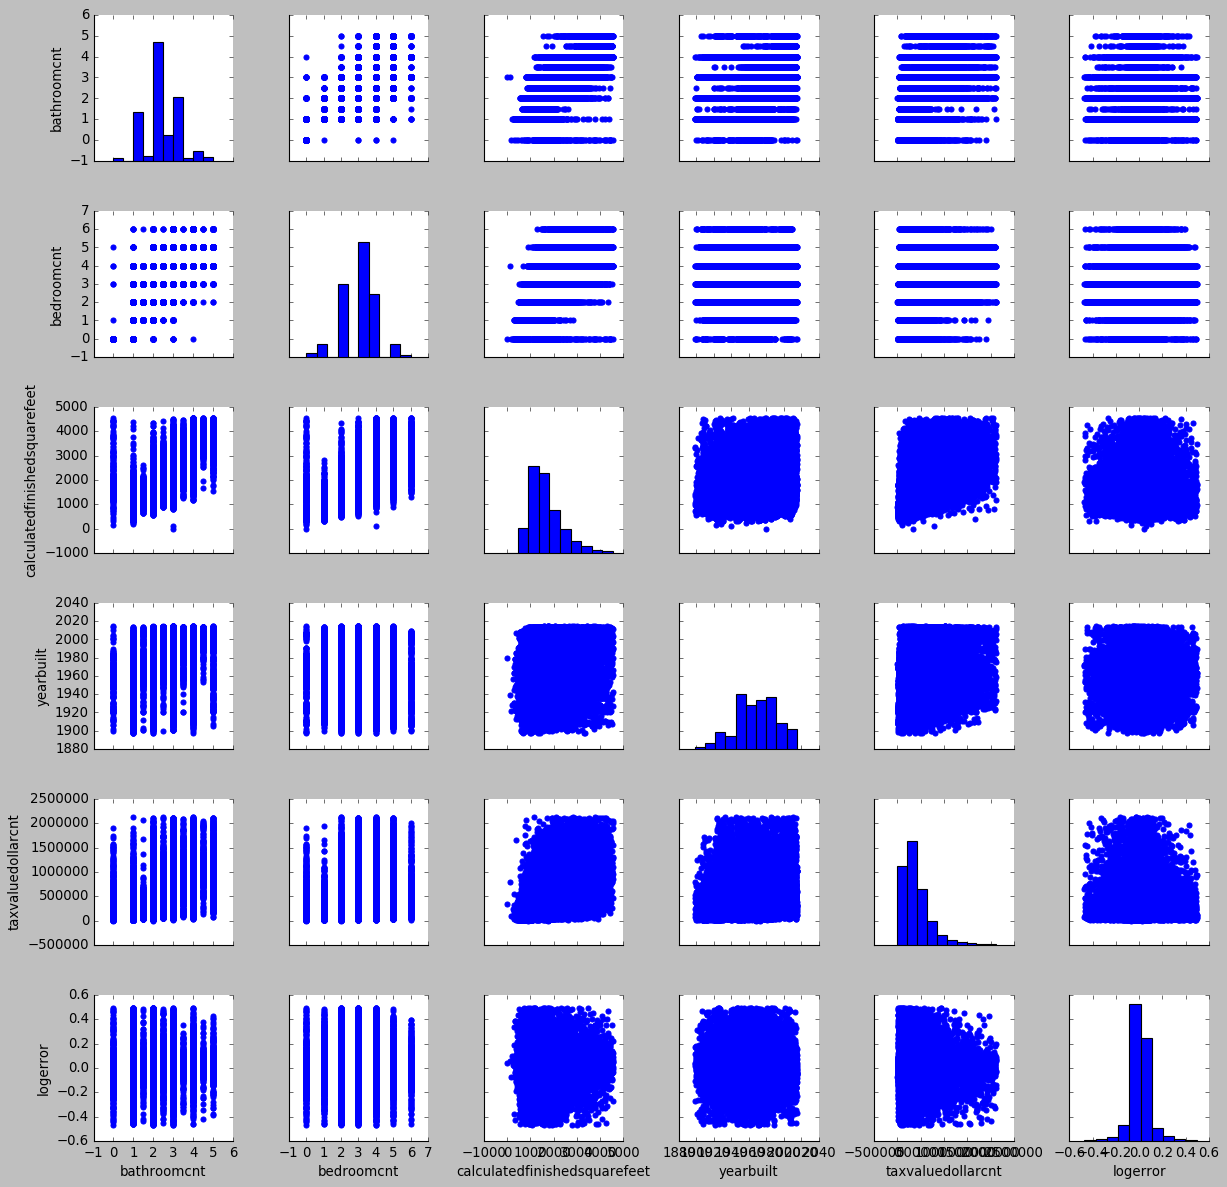

In [284]:
### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent).
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

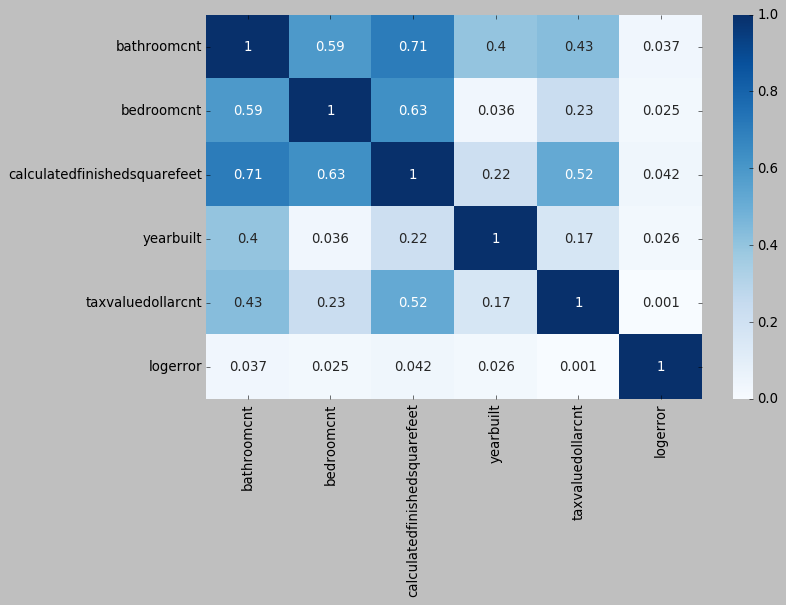

In [285]:
### Create a heatmap of the correlation between each variable pair.
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [286]:
pd.value_counts(train['bathroomcnt'].values, sort=True)

2.0    28564
3.0    15382
1.0    11705
2.5     6309
4.0     2343
1.5     1290
0.0      693
3.5      691
5.0      494
4.5      369
dtype: int64

In [287]:
pd.value_counts(train['bedroomcnt'].values, sort=True)

3.0    27556
2.0    17488
4.0    15116
5.0     3176
1.0     3035
0.0      905
6.0      564
dtype: int64

In [288]:
### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms?
three_br = train[train.bedroomcnt == 3]
five_br = train[train.bedroomcnt >= 3]

from scipy.stats import ttest_ind
ttest_ind(three_br.logerror, five_br.logerror)

Ttest_indResult(statistic=-2.952943548771169, pvalue=0.003148584418341588)

In [289]:
### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)
one_ba = train[train.bathroomcnt <= 2]
four_ba = train[train.bathroomcnt >= 3]

from scipy.stats import ttest_ind
ttest_ind(one_ba.logerror, four_ba.logerror)

Ttest_indResult(statistic=-8.363763285558528, pvalue=6.20027143983218e-17)

### Data Modeling

In [290]:
X_train['price_per_sqf'] = (X_train.taxvaluedollarcnt / X_train.calculatedfinishedsquarefeet)
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,price_per_sqf
44800,3.0,2.0,1065.0,1994.0,292537.0,274.682629
29427,3.0,3.0,2533.0,1925.0,1938623.0,765.346625
67432,2.5,3.0,1522.0,1987.0,515391.0,338.627464
88903,2.0,3.0,1742.0,1976.0,143603.0,82.435706
55639,1.0,3.0,1583.0,1946.0,259938.0,164.205938


In [291]:
### Create a dictionary that describe the r and p values
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

logerror_corr_dict = dict(zip(column_names, r_and_p_values))
logerror_corr_dict

{'bathroomcnt': (0.0366028433351064, 1.4753816492313379e-21),
 'bedroomcnt': (0.025477700167304426, 3.203368227625692e-11),
 'calculatedfinishedsquarefeet': (0.04153786174280137, 2.6649241253955087e-27),
 'yearbuilt': (0.026238840584661874, 8.186280103148388e-12),
 'taxvaluedollarcnt': (0.0010423524617721404, 0.7860162117092678),
 'price_per_sqf': (-0.00399195740740803, 0.2984631654555112)}

In [292]:
### Feature selection using statsmodels.OLS (Ordinary Least Squares)
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     114.5
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          2.07e-144
Time:                        14:53:26   Log-Likelihood:                 69572.
No. Observations:               67840   AIC:                        -1.391e+05
Df Residuals:                   67834   BIC:                        -1.391e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                      0.0022      0.001      3.718      0.000       0.001       0.003
bedroomcnt                      -0.0010      0.000     -2.251      0.024      -0.002      -0.000
calculatedfinishedsquarefeet  6.327e-06   8.02e-07      7.888      0.000    4.76e-06     7.9e-06
yearbuilt                    -6.247e-07   5.64e-07     -1.107      0.268   -1.73e-06    4.81e-07
taxvaluedollarcnt            -9.329e-09   1.36e-09     -6.845      0.000    -1.2e-08   -6.66e-09
price_per_sqf                 2.714e-07   5.13e-07      0.529      0.596   -7.33e-07    1.28e-06
==============================================================================
Omnibus:                    10891.689   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123542.832
Skew:                           0.420   Prob(JB):                         0.00
Kurtosis:                       9.558   Cond. No.                     9.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""